In [1]:
#https://tutorialspoint.com/python/python_data_operations.htm
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn import cross_validation
import re
import operator
from sklearn.feature_selection import SelectKBest, f_classif
pd.options.display.max_rows = 10
train=pd.read_csv('train.csv',delimiter=',') # lire le fichier csv contenu dans le fichier de reception
train

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
#Survived: indique la mort ou la survie du passenger
#Pclass la classe des chambre du navires à 3 niveaux 1 meilleure, 2 intermédiaire
#SisbSp Sibling and Spouse: Nbre de membre de famille du passaenger de type frère, soeur, demi-frère, demi-soeur, époux ou épouse
#Parch(Parent an Child) le nombre de membre de la famille du passaenger du type père mère fils fille beau-fils,belle-fille
#ticket le numéro du ticket: une variable catégorielle
#Fare prix du ticket
#Cabin: numéro de ticket
#Embarked le port d'embarquement
#type de chaque colonne

In [3]:
#Reindexé
train.set_index('PassengerId',inplace=True,drop=True)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
#pd.options.display.max_rows = 891
#énumération des colonnes
print(train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
           ... 
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
Length: 11, dtype: int64

In [6]:
train.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William H

In [7]:
import matplotlib.pyplot as plt
x=train["Survived"].value_counts()
y=["Victime","Survivant"]
plt.bar(y[0],x[0],label="Victime",align="center",edgecolor='white',color='b')
plt.bar(y[1],x[1],label="Survivant",align="center",edgecolor='white',color='g')
plt.legend()
plt.ylabel("Nb. de Personnes")
plt.xlabel("Victime/Survivant")
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
x=train["Survived"].value_counts()
x

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# Modèle Zero
features=['Fare','SibSp','Parch']
#Target est la variable de expliquée
target=train["Survived"].values 
target


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [10]:
def parse_model_0(X):
    X=X[features]
    return X
X = parse_model_0(train.copy())
X

,Fare,SibSp,Parch
PassengerId,,,
1,7.2500,1,0
2,71.2833,1,0
3,7.9250,0,0
4,53.1000,1,0
5,8.0500,0,0
...,...,...,...
887,13.0000,0,0
888,30.0000,0,0
889,23.4500,1,2


In [11]:
#Validation des modèles
#La validation croisés qui est appliquée quand le nombre de ligne est petit
#On effectue plusieurs echantillons aléatoires sur lesquels sont calculées 
#les scores et pour le score final ont une moyenne des score


In [12]:
#Pour faire du machine learning on importe sklearn
#On cherche à estimer le score de l'algo sur nos données
from sklearn.model_selection import cross_val_score

def compute_score(clf,X,y): #clf est pour classification, X notre matrice precédente, y notre target 
    xval=cross_val_score(clf,X,y,cv=5)
    print("Accuracy: %0.3f(+/-%0.2f)[%s]"%(xval.mean()*100,xval.std()*100,'Cross Validation'))
    #les expressions en % () permet de formater les sorties
    #1ère valeur après les %, doit avoir 3 est de type float avec 3 chiffres après la virgule
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
compute_score(lr,X,target)

Accuracy: 67.455(+/-4.66)[Cross Validation]


In [13]:
#On ameliore le modèle en ajoutant de nouvelles variables. On peut derterminer l'importance d'une variable 
#avec les anciennes méthodes mais on utilise de plus en plus le feature engeneering

In [14]:
from numpy import array
import matplotlib.pyplot as plt
def plot_hist(feature,bins=5):
    survived=train[train.Survived==1]
    dead=train[train.Survived==0]
    x1=array(dead[feature].dropna())
    x2=array(survived[feature].dropna())
    plt.hist([x1,x2],label=["Victime","Survivant"],bins=bins)#,color=[",'b']
    plt.legend(loc='upper center')
    plt.ylabel("Nb. de Personnes")
    plt.title('distribution relative de %s'%feature)
    plt.show()

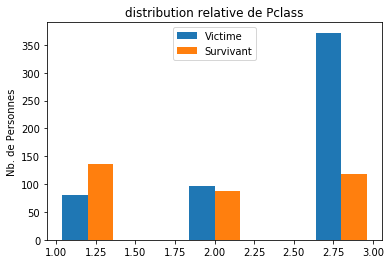

In [15]:
plot_hist('Pclass')

In [16]:
#Ceux qui ont plus de chance de survie était en classe 1 et ceux qui ont plus de chance de mouurir sont dans la classe 3

In [17]:
#Méthode pour retravailler une variable qu'on veut intégrer dans le modèle de machine learning
#Lorsque la variable à un petit nombre de modalité, on crée des variables dummies qui améliore la qualité du modèle

In [18]:
features.append('Pclass')
features

['Fare', 'SibSp', 'Parch', 'Pclass']

In [19]:
def parse_model_1(X):
    X=X[features]
    for i in range(3,len(features)):
        class_dummies=pd.get_dummies(X[features[i]],prefix='split_'and features[i])
        X=X.join(class_dummies)
        del X[features[i]]
    return X

In [20]:
X=parse_model_1(train.copy())
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
Fare        891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Pclass_1    891 non-null uint8
Pclass_2    891 non-null uint8
Pclass_3    891 non-null uint8
dtypes: float64(1), int64(2), uint8(3)
memory usage: 70.5 KB


In [21]:
compute_score(lr,X,target)

Accuracy: 69.266(+/-5.36)[Cross Validation]


In [22]:
#on s'intéresse au coefficient. fit pour dire qu'il construit le modèle
def coef(clf,X,y):
    clf.fit(X,target)
    print(clf.coef_)
coef(lr,X,target)

[[ 0.00669907 -0.150896    0.23357229  0.3730938   0.100852   -0.85258357]]


In [23]:
#On peut dire que plus le nombre est positivement loin de 0, la proba est survie est élévé
#La variable Fare n'est pas significative pour cette modelisation. On peut donc pour ce modèle faire ce qui suit
#del X['Fare']
#compute_score(lr,X,target)

In [24]:
################# Ensemble des algo sur le marché & Les techninques de paramétrage & les correspondances #######################

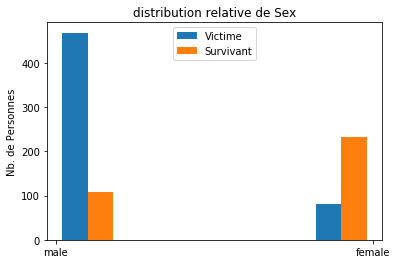

In [25]:
#Histogramme du sex en fonction de la variable survie
plot_hist('Sex')

In [26]:
features.append('Sex')
features
#CODE DU PROF
#features.append('Sex')
#def parse_model_2(X):
    #X=X[features]
    #to_dummy=['Pclass','Sex']
    #for dum in to_dummy:
    #split_temp

['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex']

In [27]:
#Modele 2
X=parse_model_1(train.copy())
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Fare          891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
dtypes: float64(1), int64(2), uint8(5)
memory usage: 72.2 KB


In [28]:
compute_score(lr,X,target)

Accuracy: 79.461(+/-1.65)[Cross Validation]


In [29]:
train.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
#Creer une nouvelle variable base['nom']
train['surname']=train['Name'].apply(lambda x: x.split(',')[0].strip())
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston


In [31]:
#Recupére les titres
#train['title']=train['Name'].apply(lambda x: (x.split(',')[1]).split('.')[0].strip())
train["Title"]=train['Name'].apply(lambda x: re.search('([A-Za-z]+)\.',x).group(1))
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss


In [32]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Dr":5,"Rev":6,"Major":7,"Col":7,"Mlle":2,"Mme":3,"Don":9,
               "Dona":9,"Lady":10,"Jonkheer":10,"Sir":9,"Capt":7,"Ms":2}

In [33]:
train["TitleCat"]=train.loc[:,'Title'].map(title_mapping)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
surname     891 non-null object
Title       891 non-null object
TitleCat    890 non-null float64
dtypes: float64(3), int64(4), object(7)
memory usage: 104.4+ KB


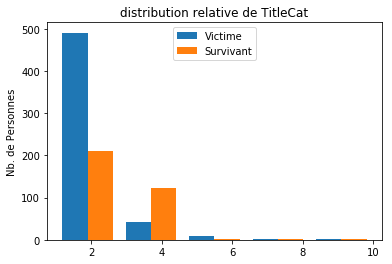

In [35]:
plot_hist('TitleCat',5)

In [36]:
#Modele 3
features.append('TitleCat')
features
X=parse_model_1(train.copy())
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 17 columns):
Fare             891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Pclass_1         891 non-null uint8
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
Sex_female       891 non-null uint8
Sex_male         891 non-null uint8
TitleCat_1.0     891 non-null uint8
TitleCat_2.0     891 non-null uint8
TitleCat_3.0     891 non-null uint8
TitleCat_4.0     891 non-null uint8
TitleCat_5.0     891 non-null uint8
TitleCat_6.0     891 non-null uint8
TitleCat_7.0     891 non-null uint8
TitleCat_9.0     891 non-null uint8
TitleCat_10.0    891 non-null uint8
dtypes: float64(1), int64(2), uint8(14)
memory usage: 80.0 KB


In [37]:
compute_score(lr,X,target)

Accuracy: 81.709(+/-2.61)[Cross Validation]


In [38]:
#Correction des valeurs manquantes
train['Age'] = train.Age.fillna(train.Age.median())
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Title,TitleCat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,3.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,6.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,2.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,2.0


In [39]:
train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         891
           ... 
Cabin       204
Embarked    889
surname     891
Title       891
TitleCat    890
Length: 14, dtype: int64

In [40]:
child_age=18
def get_person(passenger):
    age,sex=passenger
    if (age < child_age):
        return 'child'
    elif(sex=='female'):
        return 'female_adult'
    else:
        return 'male_adult'

In [41]:
#On concatène l'ancien train d'où il recupère seulement Age et Sex avec la collone personne
train=pd.concat([train,pd.DataFrame(train[['Age','Sex']].apply(get_person,axis=1),columns=['Person'])],axis=1)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Title,TitleCat,Person
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,1.0,male_adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,3.0,female_adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,2.0,female_adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,3.0,female_adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1.0,male_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,6.0,male_adult
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,2.0,female_adult
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,2.0,female_adult


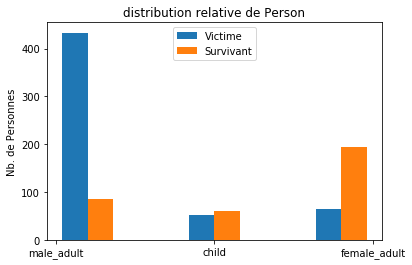

In [42]:
plot_hist('Person',5)

In [43]:
#Modele 4
features.append('Person')
X=parse_model_1(train.copy())
compute_score(lr,X,target)

Accuracy: 82.045(+/-2.60)[Cross Validation]


In [44]:
train['Is_children']=train.Age<8
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Title,TitleCat,Person,Is_children
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,1.0,male_adult,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,3.0,female_adult,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,2.0,female_adult,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,3.0,female_adult,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1.0,male_adult,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,6.0,male_adult,False
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,2.0,female_adult,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,2.0,female_adult,False


In [45]:
def get_children(is_children):
    if is_children:
        return '1'
    else:
        return '0'
train["Children"]=train["Is_children"].apply(get_children)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Title,TitleCat,Person,Is_children,Children
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,1.0,male_adult,False,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,3.0,female_adult,False,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,2.0,female_adult,False,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,3.0,female_adult,False,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1.0,male_adult,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,6.0,male_adult,False,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,2.0,female_adult,False,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,2.0,female_adult,False,0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 17 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
surname        891 non-null object
Title          891 non-null object
TitleCat       890 non-null float64
Person         891 non-null object
Is_children    891 non-null bool
Children       891 non-null object
dtypes: bool(1), float64(3), int64(4), object(9)
memory usage: 119.2+ KB


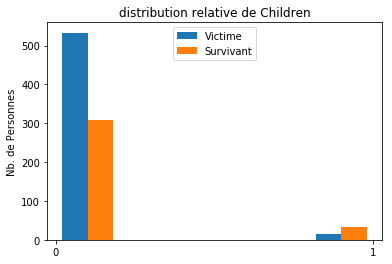

In [47]:
plot_hist('Children',5)

In [48]:
#Modele 5
features.append('Children')
X=parse_model_1(train.copy())
compute_score(lr,X,target)

Accuracy: 82.046(+/-2.28)[Cross Validation]


In [49]:
train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
C70            1
E63            1
B30            1
D50            1
C46            1
Name: Cabin, Length: 147, dtype: int64

In [50]:
#def get_CabinLevel(Cabin):
 #   lettre = ['A','B','C','D','E','F','G']
  #  for i in lettre:
   #     if i in str(Cabin).upper() and str(Cabin).upper() !='NAN':
    #        return i
#train["CabinNiv"]=train["Cabin"].apply(get_CabinLevel)
#train
train['CabinCat'] = pd.Categorical(train.Cabin.fillna('0').apply(lambda x: x[0])).codes
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Title,TitleCat,Person,Is_children,Children,CabinCat
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,1.0,male_adult,False,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,3.0,female_adult,False,0,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,2.0,female_adult,False,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,3.0,female_adult,False,0,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1.0,male_adult,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,6.0,male_adult,False,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,2.0,female_adult,False,0,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,2.0,female_adult,False,0,0


In [51]:
# function to get oven/odd/null from cabine 
def get_type_cabine(cabine):
    # Use a regular expression to search for a title. 
    cabine_search = re.search('\d+', cabine)
    # If the title exists, extract and return it.
    if cabine_search:
        num = cabine_search.group(0)
        if np.float64(num) % 2 == 0:
            return '2'
        else:
            return '1'
    return '0'
train["Cabin"] = train["Cabin"].fillna(" ")

train["CabinType"] = train["Cabin"].apply(get_type_cabine)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Title,TitleCat,Person,Is_children,Children,CabinCat,CabinType
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,Braund,Mr,1.0,male_adult,False,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,3.0,female_adult,False,0,3,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,Heikkinen,Miss,2.0,female_adult,False,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,3.0,female_adult,False,0,3,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,Allen,Mr,1.0,male_adult,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,,S,Montvila,Rev,6.0,male_adult,False,0,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,2.0,female_adult,False,0,2,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,,S,Johnston,Miss,2.0,female_adult,False,0,0,0


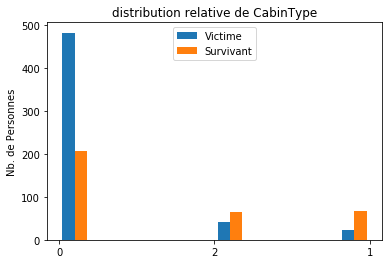

In [52]:
plot_hist('CabinType',10)

In [53]:
#Modele 6
features.append('CabinType')
features.append('CabinCat')
X=parse_model_1(train.copy())
compute_score(lr,X,target)

lr.fit(X, target) 
score = lr.score(X, target) 
print("Accuracy: %0.3f [%s]" % (score*100, 'full test'))

Accuracy: 82.500(+/-2.55)[Cross Validation]
Accuracy: 83.502 [full test]


In [54]:
features

['Fare',
 'SibSp',
 'Parch',
 'Pclass',
 'Sex',
 'TitleCat',
 'Person',
 'Children',
 'CabinType',
 'CabinCat']

In [55]:
### FEATURES BASED ON TICKET   --------------------------------------------------------
table_ticket = pd.DataFrame(train["Ticket"].value_counts())
table_ticket.rename(columns={'Ticket':'Ticket_Members'}, inplace=True)

table_ticket['Ticket_perishing_women'] = train.Ticket[(train.Person == 'female_adult') 
                                    & (train.Survived == 0.0) 
                                    & ((train.Parch > 0) | (train.SibSp > 0))].value_counts()
table_ticket['Ticket_perishing_women'] = table_ticket['Ticket_perishing_women'].fillna(0)
table_ticket['Ticket_perishing_women'][table_ticket['Ticket_perishing_women'] > 0] = 1.0 

table_ticket['Ticket_surviving_men'] = train.Ticket[(train.Person == 'male_adult') 
                                    & (train.Survived == 1.0) 
                                    & ((train.Parch > 0) | (train.SibSp > 0))].value_counts()
table_ticket['Ticket_surviving_men'] = table_ticket['Ticket_surviving_men'].fillna(0)
table_ticket['Ticket_surviving_men'][table_ticket['Ticket_surviving_men'] > 0] = 1.0 

table_ticket["Ticket_Id"]= pd.Categorical(table_ticket.index).codes
# compress under 3 members into one code.
table_ticket["Ticket_Id"][table_ticket["Ticket_Members"] < 3 ] = -1
table_ticket["Ticket_Members"] = pd.cut(table_ticket["Ticket_Members"], bins=[0,1,4,20], labels=[0,1,2])

train = pd.merge(train, table_ticket, left_on="Ticket",right_index=True,how='left', sort=False)
train

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,TitleCat,Person,Is_children,Children,CabinCat,CabinType,Ticket_Members,Ticket_perishing_women,Ticket_surviving_men,Ticket_Id
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,...,1.0,male_adult,False,0,0,0,0,0.0,0.0,-1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,3.0,female_adult,False,0,3,1,0,0.0,0.0,-1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,...,2.0,female_adult,False,0,0,0,0,0.0,0.0,-1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,3.0,female_adult,False,0,3,1,1,0.0,0.0,-1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,...,1.0,male_adult,False,0,0,0,0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,,...,6.0,male_adult,False,0,0,0,0,0.0,0.0,-1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,2.0,female_adult,False,0,2,2,0,0.0,0.0,-1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,,...,2.0,female_adult,False,0,0,0,1,1.0,0.0,-1


In [56]:
##modèle 
#features.append('Ticket_Id')
#features.append('Ticket_Members')
features.append('Ticket_perishing_women')
features.append('Ticket_surviving_men')
X=parse_model_1(train.copy())
compute_score(lr,X,target)

lr.fit(X, target) 
score = lr.score(X, target) 
print("Accuracy: %0.3f [%s]" % (score*100, 'full test'))

Accuracy: 89.450(+/-1.39)[Cross Validation]
Accuracy: 89.787 [full test]


In [57]:
features

['Fare',
 'SibSp',
 'Parch',
 'Pclass',
 'Sex',
 'TitleCat',
 'Person',
 'Children',
 'CabinType',
 'CabinCat',
 'Ticket_perishing_women',
 'Ticket_surviving_men']

In [58]:
train['Embarked'].value_counts()
train["Embarked"] = pd.Categorical(train.Embarked).codes

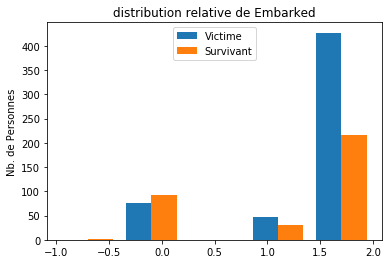

In [59]:
plot_hist('Embarked',5)

In [60]:
#Modele 6
features.append('Embarked')
X=parse_model_1(train.copy())
compute_score(lr,X,target)

lr.fit(X, target) 
score = lr.score(X, target) 
print("Accuracy: %0.3f [%s]" % (score*100, 'full test'))

Accuracy: 89.451(+/-1.08)[Cross Validation]
Accuracy: 89.787 [full test]


In [61]:
### FEATURES BASED ON SURNAME    --------------------------------------------------------
table_surname = pd.DataFrame(train["surname"].value_counts())
table_surname.rename(columns={'surname':'Surname_Members'}, inplace=True)

table_surname['Surname_perishing_women'] = train.surname[(train.Person == 'female_adult') 
                                    & (train.Survived == 0.0) 
                                    & ((train.Parch > 0) | (train.SibSp > 0))].value_counts()
table_surname['Surname_perishing_women'] = table_surname['Surname_perishing_women'].fillna(0)
table_surname['Surname_perishing_women'][table_surname['Surname_perishing_women'] > 0] = 1.0 

table_surname['Surname_surviving_men'] = train.surname[(train.Person == 'male_adult') 
                                    & (train.Survived == 1.0) 
                                    & ((train.Parch > 0) | (train.SibSp > 0))].value_counts()
table_surname['Surname_surviving_men'] = table_surname['Surname_surviving_men'].fillna(0)
table_surname['Surname_surviving_men'][table_surname['Surname_surviving_men'] > 0] = 1.0 

table_surname["Surname_Id"]= pd.Categorical(table_surname.index).codes
# compress under 3 members into one code.
table_surname["Surname_Id"][table_surname["Surname_Members"] < 3 ] = -1

table_surname["Surname_Members"] = pd.cut(table_surname["Surname_Members"], bins=[0,1,4,20], labels=[0,1,2])

train = pd.merge(train, table_surname, left_on="surname",right_index=True,how='left', sort=False)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [62]:
#Modele 6
features.append('Surname_Members')
features.append('Surname_surviving_men')
features.append('Surname_perishing_women')
X=parse_model_1(train.copy())
compute_score(lr,X,target)

lr.fit(X, target) 
score = lr.score(X, target) 
print("Accuracy: %0.3f [%s]" % (score*100, 'full test'))

Accuracy: 89.335(+/-1.35)[Cross Validation]
Accuracy: 89.787 [full test]
